In [87]:
import numpy as np 
import pandas as pd
import pickle
import requests
import matplotlib.pyplot as plt

In [2]:
import bs4 as bs

In [27]:
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text,'lxml')
#     print(soup)
    table = soup.find('table',{'class':'wikitable sortable'})
#     print (table)
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
    
    with open('sp500tickers.pickle','wb') as  f:
        pickle.dump(tickers,f)
    return tickers

In [29]:
tickers = save_sp500_tickers()

In [31]:
tickers

['MMM',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'AYI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AET',
 'AMG',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'APC',
 'ADI',
 'ANDV',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'ADM',
 'ARNC',
 'AJG',
 'AIZ',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BHGE',
 'BLL',
 'BAC',
 'BK',
 'BCR',
 'BAX',
 'BBT',
 'BDX',
 'BRK.B',
 'BBY',
 'BIIB',
 'BLK',
 'HRB',
 'BA',
 'BWA',
 'BXP',
 'BSX',
 'BHF',
 'BMY',
 'AVGO',
 'BF.B',
 'CHRW',
 'CA',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'CBOE',
 'KMX',
 'CCL',
 'CAT',
 'CBG',
 'CBS',
 'CELG',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CHK',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 '

In [44]:
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as web


In [56]:
def getDataYahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open('sp500tickers.pickle','rb') as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
        
    start = dt.datetime(2000,1,1)
    end = dt.datetime(2016,12,31)
    
    for ticker in tickers[:100]:
        try:
            print(ticker)
            if not os.path.exists('stocks_dfs/{}.csv'.format(ticker)):
                df = web.DataReader(ticker, 'yahoo', start, end)
                df.to_csv('stock_dfs/{}.csv'.format(ticker))
            else:
                print('Already have {}'.format(ticker))
        except:
            print('Cannot obtain data for ' +ticker)

In [57]:
getDataYahoo()

MMM
ABT
ABBV
ACN
ATVI
AYI
ADBE
Cannot obtain data for ADBE
AMD
AAP
Cannot obtain data for AAP
AES
AET
AMG
AFL
A
APD
Cannot obtain data for APD
AKAM
ALK
Cannot obtain data for ALK
ALB
ARE
Cannot obtain data for ARE
ALXN
ALGN
ALLE
Cannot obtain data for ALLE
AGN
ADS
Cannot obtain data for ADS
LNT
Cannot obtain data for LNT
ALL
GOOGL
GOOG
MO
AMZN
AEE
Cannot obtain data for AEE
AAL
AEP
AXP
Cannot obtain data for AXP
AIG
AMT
AWK
AMP
ABC
AME
AMGN
APH
APC
Cannot obtain data for APC
ADI
Cannot obtain data for ADI
ANDV
ANSS
ANTM
AON
AOS
APA
AIV
AAPL
AMAT
ADM
ARNC
AJG
AIZ
T
ADSK
Cannot obtain data for ADSK
ADP
AZO
AVB
AVY
BHGE
BLL
BAC
Cannot obtain data for BAC
BK
BCR
BAX
BBT
BDX
BRK.B
Cannot obtain data for BRK.B
BBY
Cannot obtain data for BBY
BIIB
BLK
Cannot obtain data for BLK
HRB
BA
Cannot obtain data for BA
BWA
BXP
BSX
BHF
BMY
AVGO
BF.B
Cannot obtain data for BF.B
CHRW
CA
COG
Cannot obtain data for COG
CDNS
CPB
COF
CAH
CBOE
KMX
CCL
CAT
CBG
CBS
CELG
CNC
CNP
Cannot obtain data for CNP


In [79]:
def compine_data():
    with open('sp500tickers.pickle','rb') as f:
        tickers = pickle.load(f)
    main_df = pd.DataFrame()
    print(len(tickers))
    for count,ticker in enumerate(tickers):
#         print(ticker)
#         print('stocks_dfs/{}.csv'.format(ticker))
        if os.path.exists('stocks_dfs/{}.csv'.format(ticker)):
            print(ticker)
            df = pd.read_csv('stocks_dfs/{}.csv'.format(ticker))
            df.set_index('Date', inplace=True)
            df.rename(columns= {'Adj Close': ticker}, inplace=True)
            df.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)
            
            if main_df.empty:
                main_df = df
            else:
                main_df = main_df.join(df, how='outer')
            if count % 10 == 0:
                print(count)
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')

In [80]:
compine_data()

505
MMM
0
ABT
ABBV
ACN
ATVI
AYI
ADBE
AMD
AES
AET
10
AMG
AFL
A
AKAM
ALB
ALXN
ALGN
20
AGN
ALL
GOOGL
GOOG
MO
AMZN
AAL
AEP
AIG
AMT
AWK
AMP
ABC
AME
AMGN
40
APH
ANDV
ANSS
ANTM
AON
AOS
APA
AIV
50
AAPL
AMAT
ADM
ARNC
AJG
AIZ
T
ADP
AZO
60
AVB
AVY
BHGE
BLL
BK
BCR
BAX
BBT
BDX
70
BIIB
HRB
BWA
BXP
BSX
BHF
80
BMY
AVGO
CHRW
CA
CDNS
CPB
COF
CAH
90
CBOE
KMX
CCL
CAT
CBG
CBS
CELG
CNC
DISH
DG
EQT
BEN
GRMN
210
GD
HPQ
JCI
MON
320
SYF
VAR
WDC
                  MMM        ABT  ABBV  ACN      ATVI  AYI       ADBE  \
Date                                                                    
1999-12-31  31.750277  10.433799   NaN  NaN  1.166288  NaN  16.693563   
2000-01-03  30.614885  10.056676   NaN  NaN  1.251975  NaN  16.274672   
2000-01-04  29.398392   9.769344   NaN  NaN  1.213892  NaN  14.909399   
2000-01-05  30.249941   9.751384   NaN  NaN  1.218653  NaN  15.204174   
2000-01-06  32.682892  10.092591   NaN  NaN  1.194851  NaN  15.328290   

                 AMD        AES       AET ...         COF        

In [81]:
main_df = pd.read_csv('sp500_joined_closes.csv')

In [83]:
main_df.head()

,Date,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AMD,AES,...,COF,CAH,CBOE,KMX,CCL,CAT,CBG,CBS,CELG,CNC
0,1999-12-31,31.750277,10.433799,NaN,NaN,1.166288,NaN,16.693563,14.46875,32.281773,...,40.062016,18.349035,NaN,1.15625,31.564684,14.494903,NaN,NaN,2.916667,NaN
1,2000-01-03,30.614885,10.056676,NaN,NaN,1.251975,NaN,16.274672,15.50000,31.310091,...,38.399250,18.900002,NaN,1.12500,30.945768,14.976139,NaN,NaN,2.820313,NaN
2,2000-01-04,29.398392,9.769344,NaN,NaN,1.213892,NaN,14.909399,14.62500,30.068480,...,36.009045,18.684399,NaN,1.09375,30.574432,14.783648,NaN,NaN,2.593750,NaN
3,2000-01-05,30.249941,9.751384,NaN,NaN,1.218653,NaN,15.204174,15.00000,30.392372,...,35.177685,20.001894,NaN,1.06250,31.605930,15.130128,NaN,NaN,2.619792,NaN
4,2000-01-06,32.682892,10.092591,NaN,NaN,1.194851,NaN,15.328290,16.00000,30.635298,...,36.788467,20.696566,NaN,1.12500,32.059803,15.900112,NaN,NaN,2.562500,NaN


In [89]:
from matplotlib import style
style.use('ggplot')

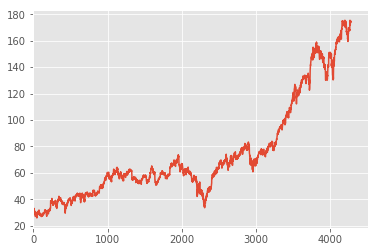

In [90]:

main_df['MMM'].plot()
plt.show()